# DEEP LEARNING: IMAGE CLASSIFICATION USING KERAS

Deep Learning is a new area of Machine Learning research, which has been introduced with the objective of moving Machine Learning closer to one of its original goals: Artificial Intelligence !

Deep learning refers to artificial neural networks that are composed of many layers. Here we have a binary classification problem with the dataset containing a large number of images of Cats and Dogs and the task is to properly identify them to the correct class. We make use of Convolutional Neural Networks(CNN's) which enables image classification at a high accuracy.In fact, Neural Networks are a hghly efficient class of algorithms for regression and classsification.

Analysis is done making use of the Keras library in Python with Tensorflow backend in Python3.6

Dataset Courtesy : https://www.superdatascience.com/machine-learning/

## Deep Learning Libraries in Python

Theano is Open Source numerical computation library that allows you to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays efficiently. Read more on installation and usage at : http://deeplearning.net/software/theano/

TensorFlow™ is an open source software library for numerical computation using data flow graphs.TensorFlow was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research, but the system is general enough to be applicable in a wide variety of other domains as well. Read more at : https://www.tensorflow.org/

Keras is a high-level neural networks API, written in Python and capable of running on top of either TensorFlow, CNTK or Theano. It was developed with a focus on enabling fast experimentation. Keras
1. Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
2. Supports both convolutional networks and recurrent networks, as well as combinations of the two.
3. Runs seamlessly on CPU and GPU.

Read more at https://keras.io/

## Data description

The data for processing must be organized folders into training set and validation set/test set with 4000 images of Cats and 4000 images of Dogs in training set and 1000 images of Cats and 1000 images of dogs in test set. In total we have 8000 instances for training and 2000 for testing. 

## Neural Network Architecture

We build a CNN which involves the following stages:
    1. Convolution, where we perform pixel by pixel Convolution of an input image using many Feature Detectors to     produce convolved images called Feature Maps
    
    2. Pooling, Max Pooling, to produce a Pooled Feature Map, keeping information intact, helps with overfitting
    
    3. Flattening, to combine features into a proper format for processing by Artificial Neural Network
    
The Flattened features are fed into the ANN for processing. Loss functions are calculated, errors evaluated and back propagated to adjust weights in the processing layers.

## Importing Libraries

We import the following libraries:

1. Sequential - for initializing neural network as layers
2. Conv2D - for adding Convolutional layers
3. MaxPooling2D - to perform Pooling
4. Flatten - to convert all Pooled  feature maps as inputs to ANN
5. Dense - to add fully connected layers in ANN

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 

In [16]:
# Importing the Keras libraries and packages
from keras.models import Sequential 
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D 
from keras.layers import Flatten 
from keras.layers import Dense 

First, initialize the CNN for classification

In [17]:
# Initialising the CNN
classifier = Sequential()

Next is Convolution.

We add a Convoluted layer with 32 feature detectors/filters of size 3 rows and columns. 

Also colour input images are converted into 3D arrays with 3 channels, Red Green Blue, shape size reduced to 64 x 64 for faster execution.
The activation function to be used is 'relu' or the Rectifier function for removing nonlinearities in image.

In [18]:
# Step 1 - Convolution (Building the architecture)
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

Now Pooling is done with a Pool size of 2 x 2. Max pooling is done to reduce complexity of the network

In [19]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

We may now add a second convolutional layer now, this is optional.This can help with accuracy

In [20]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Now do Flattening and feed the signals to the processing neural network

In [21]:
# Step 3 - Flattening
classifier.add(Flatten())

We add a fully coonected layer with 128 units (128 is resulted from experiments,power of 2 around 100) and 1 output unit. Sigmoid activation is used for output layer

In [22]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Now complie the network, with 'adam' as the Stochastic Gradient Descent Algorithm. Loss function used is 'binary'.

In [23]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Now proceed to image augmentation to reduce overfitting using ImageDataGenerator. Read more on this at https://keras.io/preprocessing/image/

In [24]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# target size is the input_size 64x64
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Now fit the CNN to the images using fit_generator. Wait for some hours to get output.

In [25]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 250,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 63)

Epoch 1/25
250/250 [==============================] - 113s - loss: 0.6667 - acc: 0.5944 - val_loss: 0.6143 - val_acc: 0.6905
Epoch 2/25
250/250 [==============================] - 103s - loss: 0.6043 - acc: 0.6731 - val_loss: 0.5820 - val_acc: 0.7065
Epoch 3/25
250/250 [==============================] - 112s - loss: 0.5584 - acc: 0.7092 - val_loss: 0.5336 - val_acc: 0.7375
Epoch 4/25
250/250 [==============================] - 107s - loss: 0.5249 - acc: 0.7386 - val_loss: 0.5151 - val_acc: 0.7425
Epoch 5/25
250/250 [==============================] - 99s - loss: 0.5114 - acc: 0.7439 - val_loss: 0.4937 - val_acc: 0.7665
Epoch 6/25
250/250 [==============================] - 111s - loss: 0.4882 - acc: 0.7611 - val_loss: 0.5003 - val_acc: 0.7545
Epoch 7/25
250/250 [==============================] - 106s - loss: 0.4689 - acc: 0.7675 - val_loss: 0.4833 - val_acc: 0.7705
Epoch 8/25
250/250 [==============================] - 106s - loss: 0.4593 - acc: 0.7765 - val_loss: 0.4835 - val_acc: 0.7690
E

## Visualization of Results

In [26]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


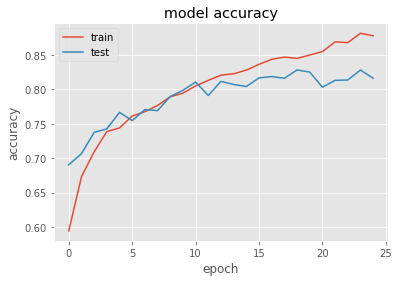

In [27]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

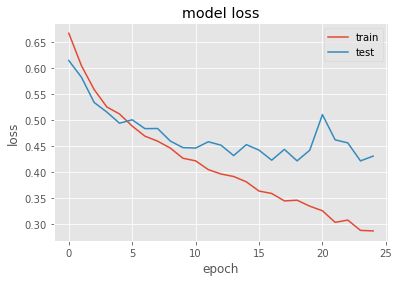

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Concluding Remarks
1. Observe that the test set accuracy can more or less closely follow the training set accuracy. Similar trend is observed for the loss function in both cases. 
2. The final test set accuracy after 25 epochs/ iterations is 81.60 %. This is above the benchmarks in most cases, but there is considerable scope for improving the accuracies.
3. Further improvement in accuracy can be iobtained by adding more convolution layers, more fully connected layers as well as by altering the target sizes of the input images.